In [2]:
%matplotlib inline
from matplotlib import pyplot as plt 

import ctypes
ic = ctypes.cdll.LoadLibrary("tisgrabber/tisgrabber_x64.dll")
from tisgrabber import old_tisgrabber as tis
tis.declareFunctions(ic)
ic.IC_InitLibrary(0)
import numpy as np

class CameraData(ctypes.Structure):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.data = None

class Camera():
    def __init__(self):
        self.hGrabber = ic.IC_CreateGrabber()
        self.connected = False
        self.connect()

    def connect(self):
        device_name = tis.D(ic.IC_GetUniqueNamefromList(0))
        print("Unique Name : {}".format(device_name))
        ic.IC_OpenDevByUniqueName(self.hGrabber, tis.T(device_name))
        if ic.IC_IsDevValid(self.hGrabber):
            self.connected = True
        else:
            print("Error connecting to device: ", device_name)
    
    def set_framerate(self):
        ic.IC_SetFrameRate(self.hGrabber, ctypes.c_float(1.0))
        
    def start_camera(self):
        self.cameraData = CameraData()
        self.grabFrameCallbackfunc = ic.FRAMEREADYCALLBACK(self.grabFrameCallback)
        ic.IC_SetFrameReadyCallback(self.hGrabber, self.grabFrameCallbackfunc, None)
        ic.IC_SetContinuousMode(self.hGrabber, 0)
        ic.IC_StartLive(self.hGrabber, 1)

    def stop(self):
        ic.IC_StopLive(self.hGrabber)

    def grabFrameCallback(self, hGrabber, pBuffer, framenumber, pData):
        print("got a frame")
        Width = ctypes.c_long()
        Height = ctypes.c_long()
        BitsPerPixel = ctypes.c_int()
        colorformat = ctypes.c_int()
        ic.IC_GetImageDescription(hGrabber, Width, Height, BitsPerPixel, colorformat)
        bpp = int(BitsPerPixel.value / 8.0)
        buffer_size = Width.value * Height.value * bpp
        if buffer_size > 0:
            image = ctypes.cast(pBuffer, ctypes.POINTER(ctypes.c_ubyte * buffer_size))
            data = np.ndarray(buffer=image.contents, dtype=np.uint8, shape=(Height.value, Width.value, bpp))
            plt.imshow(data)
            # pData.data_signal.frame.emit(pData)


In [5]:
c= Camera()

Unique Name : DYK 33UX250 43120122


In [36]:
c.set_framerate()

In [37]:
c.start_camera()

got a frame
got a frame
got a frame
got a frame
got a frame
got a frame
got a frame
got a frame
got a frame


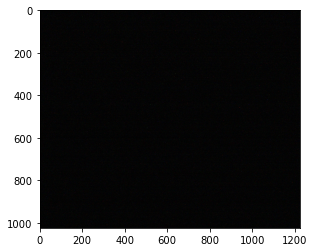

In [38]:
c.stop()

In [1]:
import ctypes
ic = ctypes.cdll.LoadLibrary("tisgrabber/tisgrabber_x64.dll")
from tisgrabber import old_tisgrabber as tis
tis.declareFunctions(ic)
ic.IC_InitLibrary(0)
import numpy as np
ic.IC_ShowDeviceSelectionDialog(None)

In [ ]:
ic.IC_

In [3]:
from tisgrabber import tisgrabber
c = tisgrabber.TIS_CAM()

In [4]:
c

In [5]:
c.GetDevices()

[b'DYK 33UX250 43120122']

In [8]:
c.ShowDeviceSelectionDialog()

In [9]:
c.get_video_format_height()

1024

In [10]:
c.get_video_format_width()

1224

In [11]:
c.GetVideoFormats()

[b'ADC1 (128x4)',
 b'ADC1 (128x96)',
 b'ADC1 (160x120)',
 b'ADC1 (176x144)',
 b'ADC1 (240x176)',
 b'ADC1 (240x180)',
 b'ADC1 (320x240)',
 b'ADC1 (320x480)',
 b'ADC1 (352x240)',
 b'ADC1 (352x288)',
 b'ADC1 (384x288)',
 b'ADC1 (640x240)',
 b'ADC1 (640x288)',
 b'ADC1 (640x480)',
 b'ADC1 (704x576)',
 b'ADC1 (720x240)',
 b'ADC1 (720x288)',
 b'ADC1 (720x480)',
 b'ADC1 (720x576)',
 b'ADC1 (768x576)',
 b'ADC1 (960x540)',
 b'ADC1 (1024x768)',
 b'ADC1 (1024x1024)',
 b'ADC1 (1224x1024)',
 b'ADC2 (128x4)',
 b'ADC2 (128x96)',
 b'ADC2 (160x120)',
 b'ADC2 (176x144)',
 b'ADC2 (240x176)',
 b'ADC2 (240x180)',
 b'ADC2 (320x240)',
 b'ADC2 (320x480)',
 b'ADC2 (352x240)',
 b'ADC2 (352x288)',
 b'ADC2 (384x288)',
 b'ADC2 (640x240)',
 b'ADC2 (640x288)',
 b'ADC2 (640x480)',
 b'ADC2 (704x576)',
 b'ADC2 (720x240)',
 b'ADC2 (720x288)',
 b'ADC2 (720x480)',
 b'ADC2 (720x576)',
 b'ADC2 (768x576)',
 b'ADC2 (960x540)',
 b'ADC2 (1024x768)',
 b'ADC2 (1024x1024)',
 b'ADC2 (1224x1024)',
 b'PPB1 (128x4)',
 b'PPB1 (128x96)',

In [12]:
c.GetInputChannels()

[]

In [13]:
c.GetVideoNormCount()

[]

In [14]:
c.GetCameraProperty()

TypeError: GetCameraProperty() missing 1 required positional argument: 'iProperty'